In [1]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 866 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!pip install --upgrade vaderSentiment

     |████████████████████████████████| 125 kB 861 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# READ DATASET

In [3]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vaksin2/5.txt
/kaggle/input/vaksin2/vaksin.csv
/kaggle/input/vaksin2/noise.txt


In [4]:
import pandas as pd

df = pd.read_csv("/kaggle/input/vaksin2/vaksin.csv")
df

,id,date,username,tweet
0,1351679596698103808,2021-01-20,windiastoria1,Manfaat vaksin selain kebal corona juga bisa k...
1,1351679591958548480,2021-01-20,kontannews,Perbankan menanti ketentuan pemberian vaksin m...
2,1351676519643418624,2021-01-20,pengawalqalbu,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2..."
3,1351675943488655360,2021-01-20,ayusalmila,Yg di suntik vaksin sinovac sampai saat ini be...
4,1351674894488985600,2021-01-20,gunung_bandung,"Mudah2an kita yg merasa beragama, apalagi org ..."
...,...,...,...,...
10257,1337925772305080320,2020-12-13,sultan_balfas,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...
10258,1337922376093200384,2020-12-13,vendivendo,Ameh corona ameh vaksin... oraa oroos... Liqui...
10259,1337919290666668032,2020-12-13,ilhamardhinug,@sociotalker @Dandhy_Laksono Cuman kepikiran j...
10260,1337911701681815552,2020-12-13,cnnindonesia,Ahli RI Respons Vaksin Corona AstraZeneca yang...


In [5]:
df1 = df.copy()
del df1['id'], df1['date'], df1['username']
df1

,tweet
0,Manfaat vaksin selain kebal corona juga bisa k...
1,Perbankan menanti ketentuan pemberian vaksin m...
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2..."
3,Yg di suntik vaksin sinovac sampai saat ini be...
4,"Mudah2an kita yg merasa beragama, apalagi org ..."
...,...
10257,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...
10258,Ameh corona ameh vaksin... oraa oroos... Liqui...
10259,@sociotalker @Dandhy_Laksono Cuman kepikiran j...
10260,Ahli RI Respons Vaksin Corona AstraZeneca yang...


In [6]:
df1 = df1.drop_duplicates()
df1

,tweet
0,Manfaat vaksin selain kebal corona juga bisa k...
1,Perbankan menanti ketentuan pemberian vaksin m...
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2..."
3,Yg di suntik vaksin sinovac sampai saat ini be...
4,"Mudah2an kita yg merasa beragama, apalagi org ..."
...,...
7408,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...
7409,Ameh corona ameh vaksin... oraa oroos... Liqui...
7410,@sociotalker @Dandhy_Laksono Cuman kepikiran j...
7411,Ahli RI Respons Vaksin Corona AstraZeneca yang...


# PREPROCESSING

# 1. CASE FOLDING

In [7]:
def make_lower_case(text):
    return text.lower()

In [8]:
kalimat = '@adudu71     ___  👊Perusaha2an kalo di sini                       prioritas dulu-dulu baru para pejuang medis nya. Yg sabar ya para tenaga medis, semoga selalu diberi kesehatan dan umur yg panjang untuk tetap menjalankan tugas. 👊👊👊👊 #VaksinasiNasional #VaksinHalal #VaksinCorona  https://t.co/XipQWFCxfg'

lowercase = make_lower_case(kalimat)
print(lowercase)

@adudu71     ___  👊perusaha2an kalo di sini                       prioritas dulu-dulu baru para pejuang medis nya. yg sabar ya para tenaga medis, semoga selalu diberi kesehatan dan umur yg panjang untuk tetap menjalankan tugas. 👊👊👊👊 #vaksinasinasional #vaksinhalal #vaksincorona  https://t.co/xipqwfcxfg


In [9]:
df1['cleaned_tweets'] = df1['tweet'].apply(lambda x: make_lower_case(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,cleaned_tweets
0,Manfaat vaksin selain kebal corona juga bisa k...,manfaat vaksin selain kebal corona juga bisa k...
1,Perbankan menanti ketentuan pemberian vaksin m...,perbankan menanti ketentuan pemberian vaksin m...
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2...","tebak kata : 1. banjir, terjadi karena ... ? 2..."
3,Yg di suntik vaksin sinovac sampai saat ini be...,yg di suntik vaksin sinovac sampai saat ini be...
4,"Mudah2an kita yg merasa beragama, apalagi org ...","mudah2an kita yg merasa beragama, apalagi org ..."
...,...,...
7408,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...,ada yang minta jokowi disuntik duluan vaksin c...
7409,Ameh corona ameh vaksin... oraa oroos... Liqui...,ameh corona ameh vaksin... oraa oroos... liqui...
7410,@sociotalker @Dandhy_Laksono Cuman kepikiran j...,@sociotalker @dandhy_laksono cuman kepikiran j...
7411,Ahli RI Respons Vaksin Corona AstraZeneca yang...,ahli ri respons vaksin corona astrazeneca yang...


# 2. NORMALISASI

In [10]:
import re

def normalisasi(text):
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"@\w+", " ", text)
  text = re.sub(r"#\w+", " ", text)
  text = re.sub(r'\W', " ", text)
  text = re.sub(r"\d+", "", text)
  text = re.sub(r'_', ' ',text)
  text = re.sub(r' +', ' ', text)
  text = re.sub(r"^\s+", '', text)
  #text = text.lstrip()
  return text

In [11]:
normal = normalisasi(lowercase)
print(normal)

perusahaan kalo di sini prioritas dulu dulu baru para pejuang medis nya yg sabar ya para tenaga medis semoga selalu diberi kesehatan dan umur yg panjang untuk tetap menjalankan tugas 


In [12]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: normalisasi(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,cleaned_tweets
0,Manfaat vaksin selain kebal corona juga bisa k...,manfaat vaksin selain kebal corona juga bisa k...
1,Perbankan menanti ketentuan pemberian vaksin m...,perbankan menanti ketentuan pemberian vaksin m...
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2...",tebak kata banjir terjadi karena gunung meletu...
3,Yg di suntik vaksin sinovac sampai saat ini be...,yg di suntik vaksin sinovac sampai saat ini be...
4,"Mudah2an kita yg merasa beragama, apalagi org ...",mudahan kita yg merasa beragama apalagi org is...
...,...,...
7408,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...,ada yang minta jokowi disuntik duluan vaksin c...
7409,Ameh corona ameh vaksin... oraa oroos... Liqui...,ameh corona ameh vaksin oraa oroos liquidku or...
7410,@sociotalker @Dandhy_Laksono Cuman kepikiran j...,cuman kepikiran jangan sampai gara gara ngebet...
7411,Ahli RI Respons Vaksin Corona AstraZeneca yang...,ahli ri respons vaksin corona astrazeneca yang...


# 3. BAKU

In [13]:
def kbbi(token): 
    kbba=[kamus.strip('\n').strip('\r') for kamus in open('/kaggle/input/vaksin2/5.txt')]
    dic={}
    for i in kbba: 
        (key,val)=i.split('\t')
        dic[str(key)]=val 
    final_string = ' '.join(str(dic.get(word, word)) for word in token)
    return final_string

def baku(text):
    text=text.split()
    text=kbbi(text)
    return text

In [14]:
katabaku = baku(normal)
print(katabaku)

perusahaan kalau di sini prioritas dulu dulu baru para pejuang medis nya yang sabar iya para tenaga medis semoga selalu diberi kesehatan dan umur yang panjang untuk tetap menjalankan tugas


In [15]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: baku(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,cleaned_tweets
0,Manfaat vaksin selain kebal corona juga bisa k...,manfaat vaksin selain kebal corona juga bisa k...
1,Perbankan menanti ketentuan pemberian vaksin m...,perbankan menanti ketentuan pemberian vaksin m...
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2...",tebak kata banjir terjadi karena gunung meletu...
3,Yg di suntik vaksin sinovac sampai saat ini be...,yang di suntik vaksin sinovac sampai saat ini ...
4,"Mudah2an kita yg merasa beragama, apalagi org ...",semoga kita yang merasa beragama apalagi orang...
...,...,...
7408,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...,ada yang minta jokowi disuntik duluan vaksin c...
7409,Ameh corona ameh vaksin... oraa oroos... Liqui...,mau corona mau vaksin tidak peduli liquidku ti...
7410,@sociotalker @Dandhy_Laksono Cuman kepikiran j...,cuma terpikirkan jangan sampai gara gara ngebe...
7411,Ahli RI Respons Vaksin Corona AstraZeneca yang...,ahli republik indonesia respons vaksin corona ...


# 4. STOPWORDS

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  

def remove_stop_words(text):
    text = text.split()
    listStopword =  set(stopwords.words('indonesian'))
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stopword = remove_stop_words(katabaku)
print(stopword)

perusahaan prioritas pejuang medis nya sabar iya tenaga medis semoga kesehatan umur menjalankan tugas


In [18]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: remove_stop_words(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,cleaned_tweets
0,Manfaat vaksin selain kebal corona juga bisa k...,manfaat vaksin kebal corona kebal hukum tertan...
1,Perbankan menanti ketentuan pemberian vaksin m...,perbankan ketentuan pemberian vaksin mandiri
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2...",tebak banjir gunung meletus tanah longsor vaks...
3,Yg di suntik vaksin sinovac sampai saat ini be...,suntik vaksin sinovac laporan kematian preside...
4,"Mudah2an kita yg merasa beragama, apalagi org ...",semoga beragama orang islam mendukung upaya pe...
...,...,...
7408,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...,jokowi disuntik duluan vaksin corona luhut pre...
7409,Ameh corona ameh vaksin... oraa oroos... Liqui...,corona vaksin peduli liquidku dibayari negara
7410,@sociotalker @Dandhy_Laksono Cuman kepikiran j...,terpikirkan gara gara ngebet vaksin laku isu k...
7411,Ahli RI Respons Vaksin Corona AstraZeneca yang...,ahli republik indonesia respons vaksin corona ...


In [19]:
def noise(text): 
    text = text.split()
    listStopword =  [kamus.strip('\n').strip('\r') for kamus in open('/kaggle/input/vaksin2/noise.txt')]
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

In [20]:
nois = noise(stopword)
print(nois)

perusahaan prioritas pejuang medis sabar tenaga medis semoga kesehatan umur menjalankan tugas


In [21]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: noise(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,cleaned_tweets
0,Manfaat vaksin selain kebal corona juga bisa k...,manfaat vaksin kebal corona kebal hukum tertan...
1,Perbankan menanti ketentuan pemberian vaksin m...,perbankan ketentuan pemberian vaksin mandiri
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2...",tebak banjir gunung meletus tanah longsor vaks...
3,Yg di suntik vaksin sinovac sampai saat ini be...,suntik vaksin sinovac laporan kematian preside...
4,"Mudah2an kita yg merasa beragama, apalagi org ...",semoga beragama orang islam mendukung upaya pe...
...,...,...
7408,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...,jokowi disuntik duluan vaksin corona luhut pre...
7409,Ameh corona ameh vaksin... oraa oroos... Liqui...,corona vaksin peduli liquidku dibayari negara
7410,@sociotalker @Dandhy_Laksono Cuman kepikiran j...,terpikirkan gara gara ngebet vaksin laku isu k...
7411,Ahli RI Respons Vaksin Corona AstraZeneca yang...,ahli republik indonesia respons vaksin corona ...


# 5. STEAMING

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def steamming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    split = text.split()
    hasil = [stemmer.stem(token) for token in split]
    hasil = " ".join(hasil)
    return hasil

In [23]:
steam = steamming("Berhutang sepertinya merupakan solusi tunggal yang kerap diambil pemerintah. Setelah corona loan, kali ini wacana untuk vaksin corona gratis pun akan berbuah utang.")
print(steam)

hutang seperti rupa solusi tunggal yang kerap ambil perintah telah corona loan kali ini wacana untuk vaksin corona gratis pun akan buah utang


In [24]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: steamming(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,cleaned_tweets
0,Manfaat vaksin selain kebal corona juga bisa k...,manfaat vaksin kebal corona kebal hukum tanda ...
1,Perbankan menanti ketentuan pemberian vaksin m...,perban tentu beri vaksin mandiri
2,"Tebak Kata : 1. Banjir, terjadi karena ... ? 2...",tebak banjir gunung letus tanah longsor vaksin...
3,Yg di suntik vaksin sinovac sampai saat ini be...,suntik vaksin sinovac lapor mati presiden fili...
4,"Mudah2an kita yg merasa beragama, apalagi org ...",moga agama orang islam dukung upaya cegah tula...
...,...,...
7408,Ada yang Minta Jokowi Disuntik Duluan Vaksin C...,jokowi suntik duluan vaksin corona luhut presiden
7409,Ameh corona ameh vaksin... oraa oroos... Liqui...,corona vaksin peduli liquidku bayar negara
7410,@sociotalker @Dandhy_Laksono Cuman kepikiran j...,pikir gara gara ngebet vaksin laku isu korban ...
7411,Ahli RI Respons Vaksin Corona AstraZeneca yang...,ahli republik indonesia respons vaksin corona ...


In [25]:
df2 = df1.copy()
del df2['tweet']
df2 = df2.drop_duplicates()
df2 = df2.dropna()
df2

,cleaned_tweets
0,manfaat vaksin kebal corona kebal hukum tanda ...
1,perban tentu beri vaksin mandiri
2,tebak banjir gunung letus tanah longsor vaksin...
3,suntik vaksin sinovac lapor mati presiden fili...
4,moga agama orang islam dukung upaya cegah tula...
...,...
7408,jokowi suntik duluan vaksin corona luhut presiden
7409,corona vaksin peduli liquidku bayar negara
7410,pikir gara gara ngebet vaksin laku isu korban ...
7411,ahli republik indonesia respons vaksin corona ...


In [26]:
df2.to_csv('prepocessing.csv',index=False)

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [28]:
sid = SentimentIntensityAnalyzer()
df2['sentiment'] = df2['cleaned_tweets'].apply(lambda x: sid.polarity_scores(x))
def convert(x):
    if x <= -0.05:
        return "negative"
    elif x >= 0.05:
        return "positive"
    else:
        return "neutral"

def kategori(x):
    if x <= -0.05:
        return 1
    elif x >= 0.05:
        return 2
    else:
        return 3
"""
df2['negatif'] = df2['sentiment'].apply(lambda x:(x['neg']))
df2['positif'] = df2['sentiment'].apply(lambda x:(x['neu']))
df2['Neutral'] = df2['sentiment'].apply(lambda x:(x['pos']))"""
df2['compound'] = df2['sentiment'].apply(lambda x:(x['compound']))
df2['result'] = df2['sentiment'].apply(lambda x:convert(x['compound']))
df2['ketegori'] = df2['sentiment'].apply(lambda x:kategori(x['compound']))

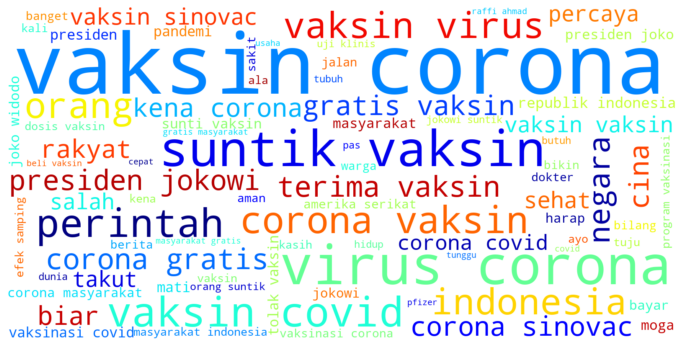

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

wd_list = df2['cleaned_tweets']
liststopwords = set(stopwords.words('indonesian'))
all_words = ' '.join([text for text in wd_list])

wordcloud = WordCloud(
    background_color='white',
    stopwords=liststopwords,
    width=1600,
    height=800,
    random_state=1,
    colormap='jet',
    max_words=80,
    max_font_size=200).generate(all_words)
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear");

<AxesSubplot:xlabel='ketegori', ylabel='count'>

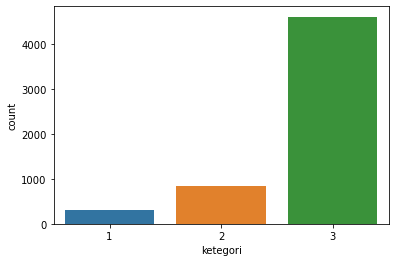

In [30]:
import seaborn as sns

sns.countplot(x="ketegori", data=df2)

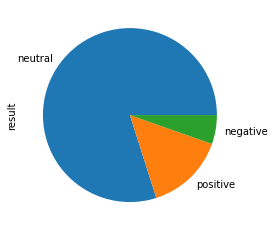

In [31]:
df2['result'].value_counts().plot.pie()
plt.show()

In [32]:
df3 = df2.copy()
del df3['sentiment'], df3['compound'],  df3['result']
df3 = df3.drop_duplicates()
df3 = df3.dropna()
df3

,cleaned_tweets,ketegori
0,manfaat vaksin kebal corona kebal hukum tanda ...,3
1,perban tentu beri vaksin mandiri,3
2,tebak banjir gunung letus tanah longsor vaksin...,3
3,suntik vaksin sinovac lapor mati presiden fili...,3
4,moga agama orang islam dukung upaya cegah tula...,3
...,...,...
7408,jokowi suntik duluan vaksin corona luhut presiden,3
7409,corona vaksin peduli liquidku bayar negara,3
7410,pikir gara gara ngebet vaksin laku isu korban ...,3
7411,ahli republik indonesia respons vaksin corona ...,3


In [33]:
df3.to_csv('pelabelan.csv',index=False)

In [34]:
df3 = df3[df3.ketegori != 3]
df3

,cleaned_tweets,ketegori
50,yall do asking too much tbh selesai corona vak...,1
76,alas takut vaksin besok obrol,1
80,sebenernya atur vaksin hak tolak maksud penjar...,2
88,kayak vaksin corona tugas pasien pakai masker ...,1
114,serah corona hilang vaksin gratis silah vaksin...,2
...,...,...
7377,idiot takut banget vaksin akan suntik mati per...,1
7385,perdana menteri kanada vaksin corona sedia gra...,2
7390,negara kapitalis sosiais usaha kasih vaksin gr...,2
7391,luhut ungkap alas jokowi prioritas vaksin corona,1


In [35]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df3, test_size=0.25)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(train['cleaned_tweets'])
X_test_cv = cv.fit_transform(test['cleaned_tweets'])

In [37]:
from sklearn.naive_bayes import MultinomialNB
y_train = train['ketegori']
y_test = test['ketegori']
x_train = train['cleaned_tweets']
x_test = test['cleaned_tweets']

In [38]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(x_train, y_train)

text_clf = text_clf.predict(x_test)
np.mean(text_clf == y_test)

0.8068965517241379

In [39]:
pipeline = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),])
pipeline = pipeline.fit(x_train, y_train)

akurasi = pipeline.predict(x_test)
np.mean(akurasi == y_test)

0.8862068965517241

<AxesSubplot:>

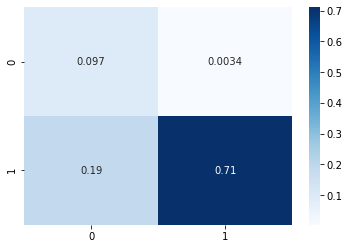

In [40]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(text_clf, y_test)
sns.heatmap(confusion/np.sum(confusion) , annot=True,  cmap='Blues')

In [41]:
pred = pipeline.predict(["pemberian vaksin covid gratis rakyat indonesia dinilai langkah optimal pandemi virus corona tanah air"])
if (pred == [1]) :
  result = "negatif"
else:
  result = "positif"

result

'positif'

In [42]:
import joblib
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [43]:
filename = 'pipeline.sav'
loaded_model = joblib.load(filename)
result = loaded_model.predict(["Pemerintah Gratiskan Vaksin COVID-19 Untuk Masyarakat itu keputusan yang sangat bagus untuk Semuanya"])
if (result == [1]) :
  result = "negatif"
else:
  result = "positif"

result

'positif'

In [44]:
import pickle
filename = 'finalized_model.sav'

pickle.dump(pipeline, open(filename, 'wb'))

In [45]:
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.predict(["Dulu pas awal awal corona koar koar minta vaksin ini itu. Sekarang udah ada vaksin bacot juga. "])
if (result == [0]) :
  result = "negatif"
else:
  result = "positif"

result

'positif'

In [46]:
result = loaded_model.predict(["budak sekolah anti vaksin selamat corona agenda dunia"])
if (result == [1]) :
  result = "negatif"
else:
  result = "positif"

result

'negatif'